In [1]:
import cv2
import numpy as np

from utils import show_images, mask_img

src = cv2.imread('./image/sudoku.png', cv2.IMREAD_GRAYSCALE)

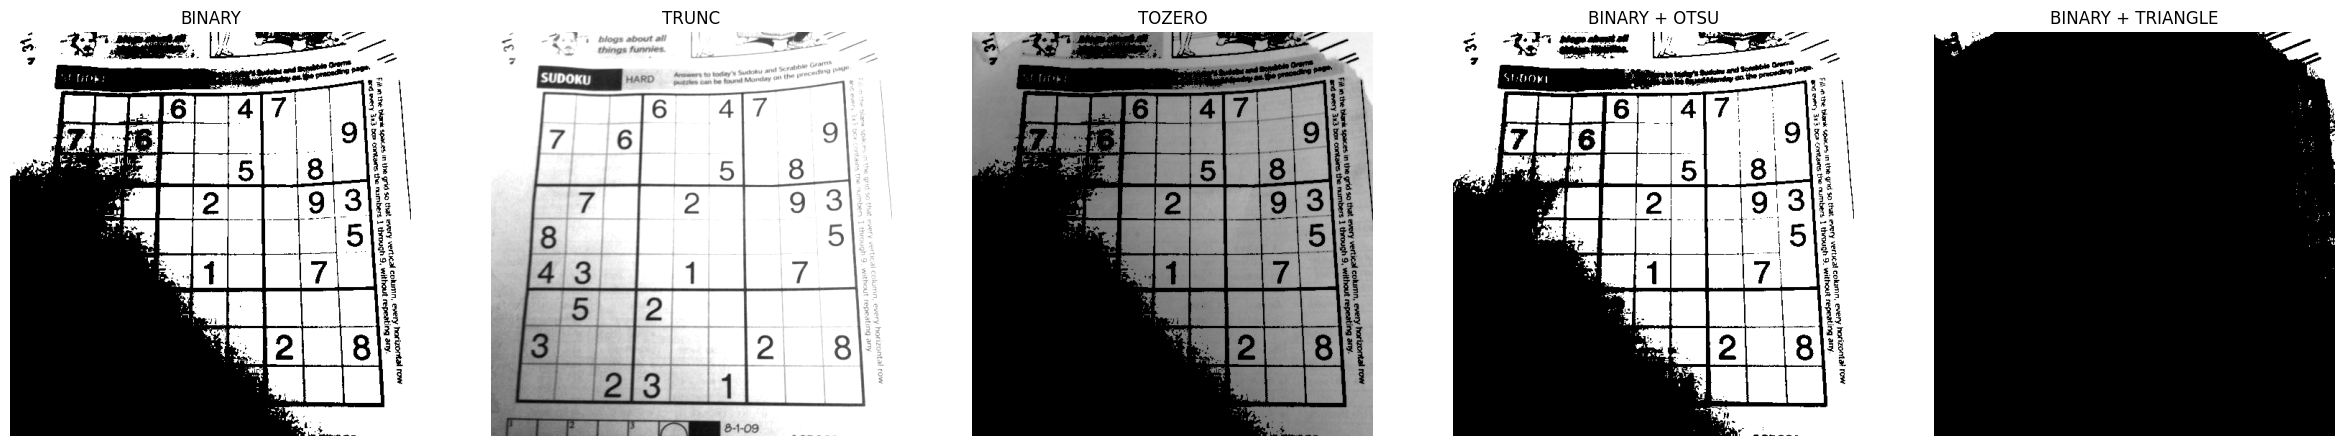

In [2]:
ret,thresh1 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY)
# ret,thresh1 = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY_INV)
ret,thresh2 = cv2.threshold(src, 100, 255, cv2.THRESH_TRUNC)
ret,thresh3 = cv2.threshold(src, 100, 255, cv2.THRESH_TOZERO)
# ret,thresh3 = cv2.threshold(src, 127, 255, cv2.THRESH_TOZERO_INV)

ret,thresh4 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
ret,thresh5 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

show_images([
    ('BINARY', thresh1),
    ('TRUNC', thresh2),
    ('TOZERO', thresh3),
    ('BINARY + OTSU', thresh4),
    ('BINARY + TRIANGLE', thresh5)
], colnum=5)

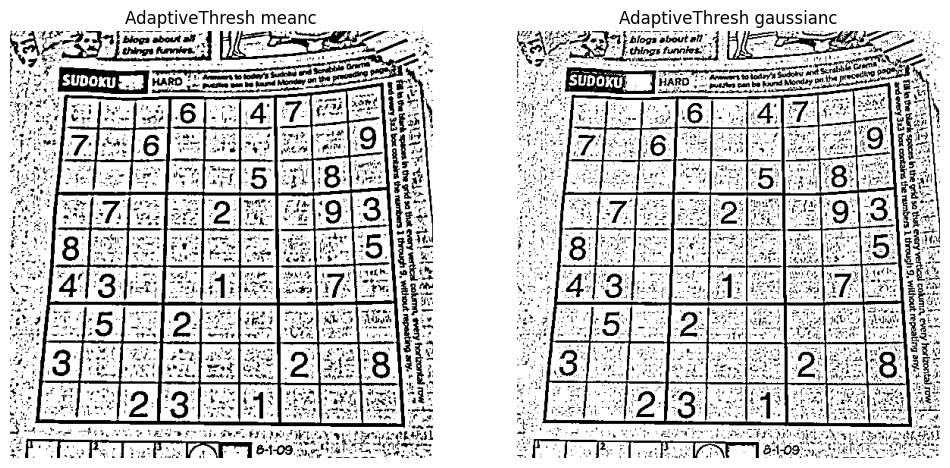

In [3]:
thresh1 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)
thresh2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)

show_images([
    ('AdaptiveThresh meanc', thresh1),
    ('AdaptiveThresh gaussianc', thresh2),
])

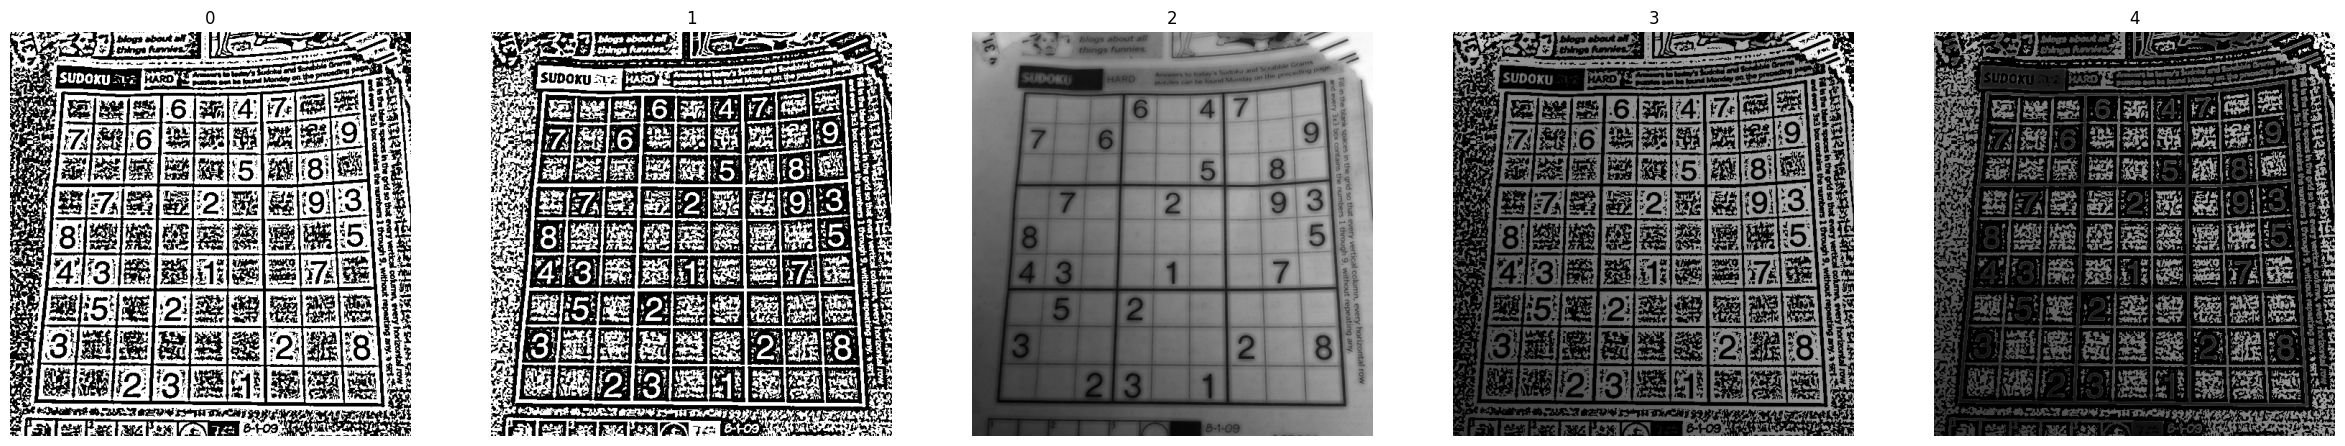

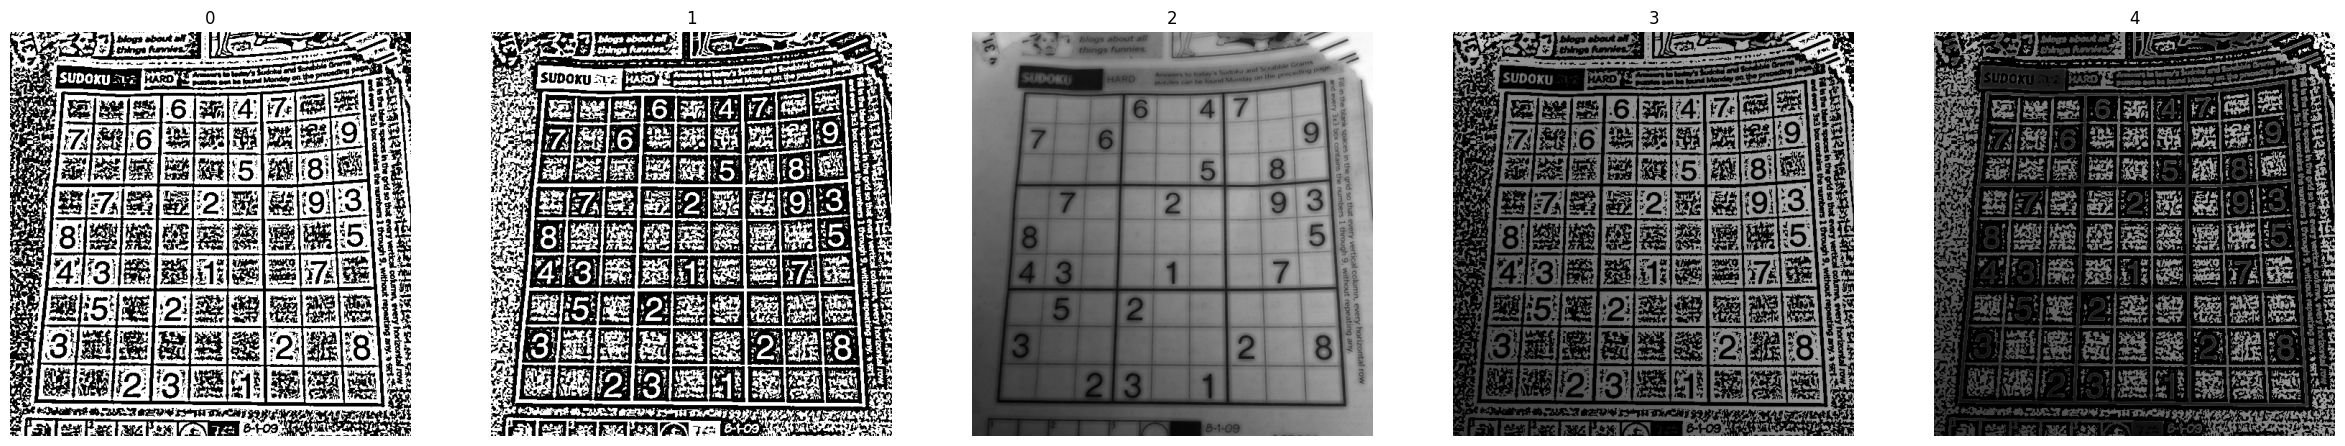

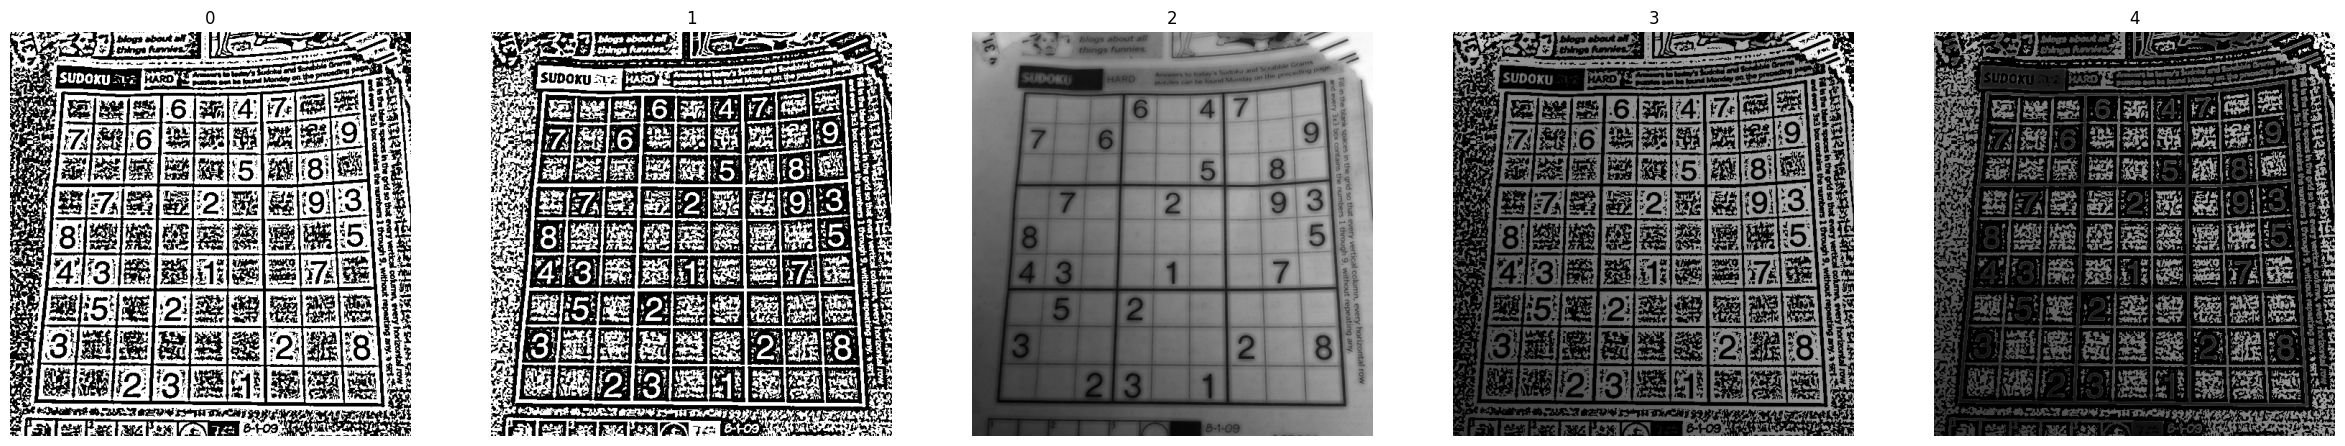

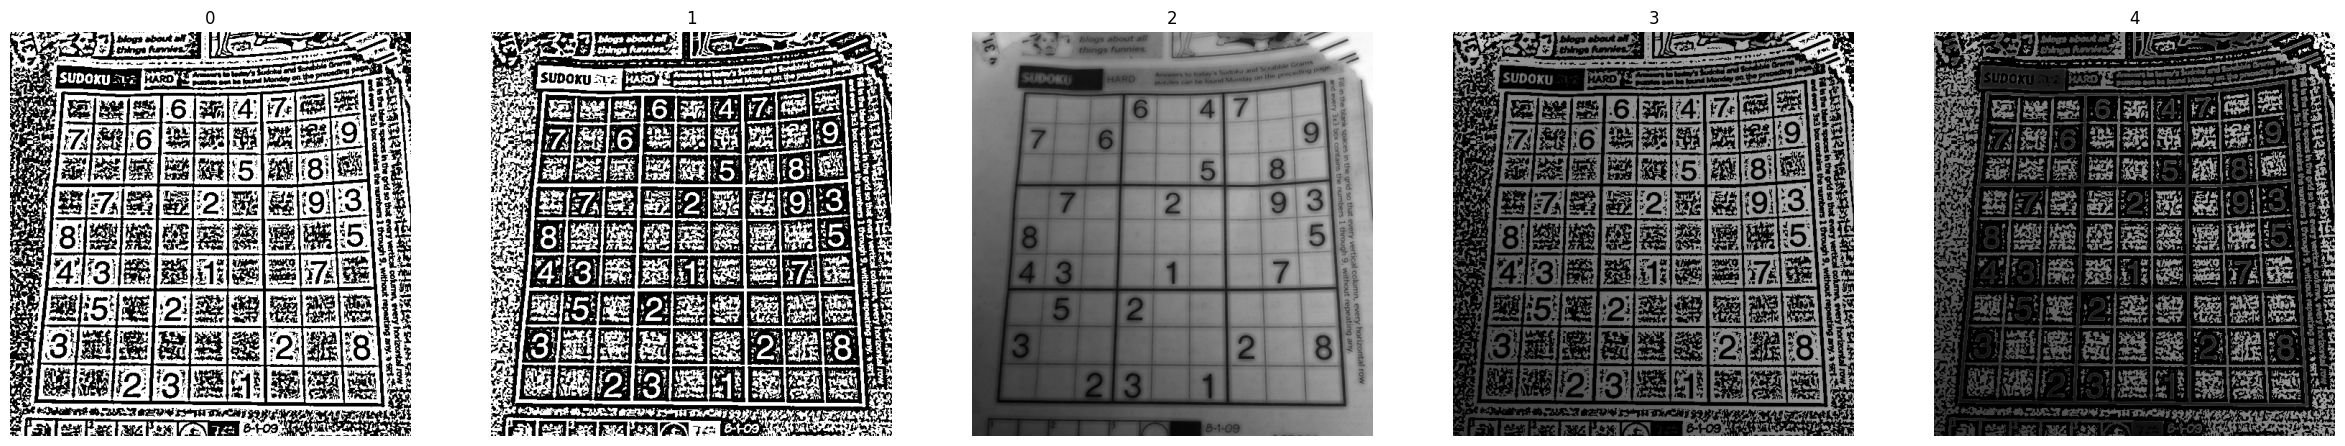

In [14]:
types = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
methods = [cv2.ximgproc.BINARIZATION_NIBLACK, cv2.ximgproc.BINARIZATION_SAUVOLA, cv2.ximgproc.BINARIZATION_NICK, cv2.ximgproc.BINARIZATION_WOLF]
blockSize = 11
k = 0 # [-1, 1]

for nowMethod in methods:
    result = []
    for nowType in types:
        thresh = cv2.ximgproc.niBlackThreshold(src, maxValue=255, type=nowType, blockSize=blockSize, k=k, binarizationMethod=nowMethod)
        result.append((str(nowType), thresh))

    show_images(result, colnum=5)